# Polynomial regression

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

random_seed = 42

Dataset generation (X, y).

In [2]:
#@title
np.random.seed(seed=random_seed)

X, y, coef = make_regression(n_samples=100, n_features=1, 
                             coef=True, random_state=random_seed)

y = 3 * X[:, 0] ** 2 - 2 * X[:, 0]
y = y + np.random.rand(y.size) * 5

Data that implies curvature.

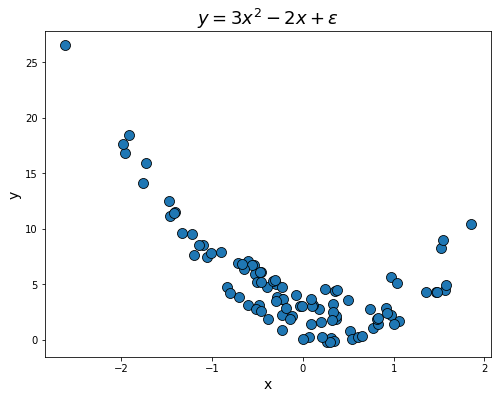

In [3]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X.flatten(), y=y, s=100, edgecolor='k')

plt.title("$y=3x^2 - 2x + \epsilon$", size=18)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.show()

In [4]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

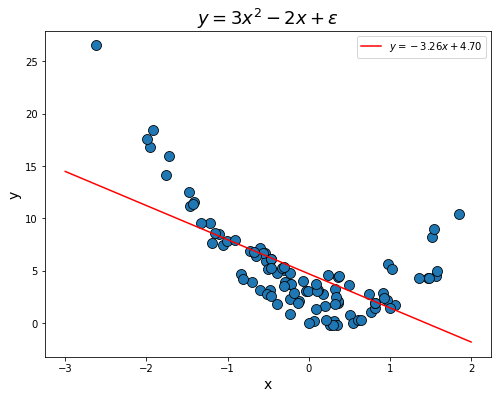

In [5]:
x_line = np.linspace(-3, 2, 100)
y_line = lr.intercept_ + lr.coef_ * x_line

plt.figure(figsize=(8, 6))

sns.scatterplot(x=X.flatten(), y=y, s=100, edgecolor='k')
sns.lineplot(x=x_line, y=y_line, color='r', 
             label="$y=%+.2f x %+.2f$" % (lr.coef_, lr.intercept_))

plt.title("$y=3x^2 - 2x + \epsilon$", size=18)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.show()

Polynomial regression model: $\ \ \mathbb{E}[y] = \beta_0 + \beta_1 x + \beta_2 x^2$

In [6]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pf.fit_transform(X)

In [7]:
X_poly[0: 3] # x, x^2

array([[ 0.19686124,  0.03875435],
       [ 0.35711257,  0.12752939],
       [-1.91328024,  3.66064129]])

In [8]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

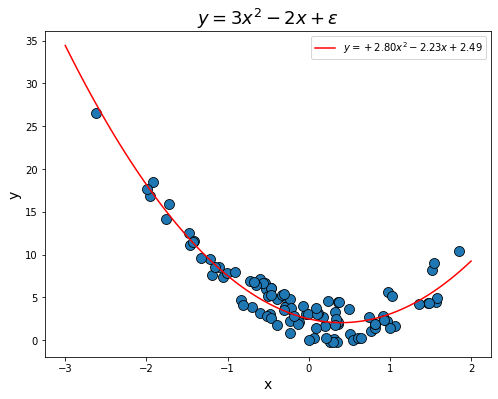

In [9]:
x_line = np.linspace(-3, 2, 100)
x_line_poly = pf.fit_transform(x_line[:, np.newaxis])
y_line = lr.intercept_ + x_line_poly @ lr.coef_

plt.figure(figsize=(8, 6))

sns.scatterplot(x=X.flatten(), y=y, s=100, edgecolor='k')
sns.lineplot(x=x_line, y=y_line, color='r', 
             label="$y=%+.2f x^2 %+.2f x %+.2f$" % (lr.coef_[1], lr.coef_[0], lr.intercept_))

plt.title("$y=3x^2 - 2x + \epsilon$", size=18)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.show()

Feature interactions.

In [10]:
#@title
np.random.seed(seed=random_seed)

X, y, coef = make_regression(n_samples=100, n_features=2, 
                             bias=100, coef=True, random_state=random_seed)

y = X[:, 0] + X[:, 1] + 10 * X[:, 0] * X[:, 1]
y = y + np.random.rand(y.size)

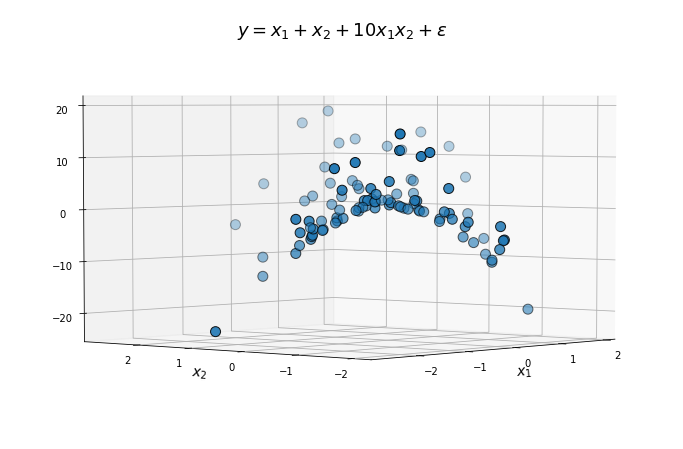

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))

ax.scatter(X[:, 0], X[:, 1], y, s=100, edgecolor='k')

plt.title("$y=x_1 + x_2 + 10 x_1 x_2 + \epsilon$", size=18)
plt.xlabel("$x_1$", size=14)
plt.ylabel("$x_2$", size=14)

elev = 3 #@param {type:"slider", min:0, max:100, step:1}
angle = 221 #@param {type:"slider", min:0, max:360, step:1}
ax.view_init(elev, angle)
plt.show()

In [12]:
X[0:3] # x_1, x_2

array([[-1.60748323,  0.18463386],
       [-0.26465683,  2.72016917],
       [ 1.46564877, -0.2257763 ]])

In [13]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

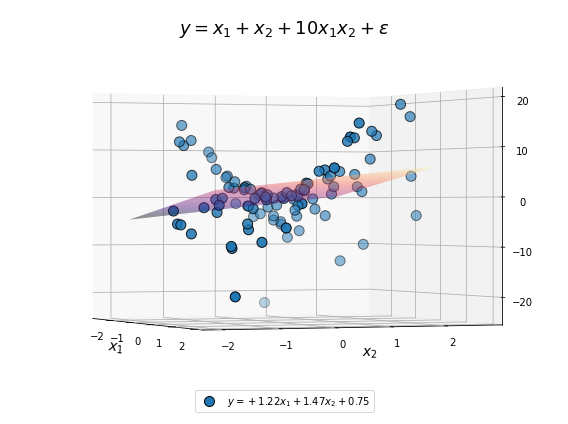

In [14]:
xx = np.linspace((-2, -2), (2, 2), 100)
xx1, xx2 = np.meshgrid(xx[:, 0], xx[:, 1])
zz = lr.intercept_ + lr.coef_[0] * xx1 + lr.coef_[1] * xx2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 6))

ax.scatter(X[:, 0], X[:, 1], y, s=100, edgecolor='k', 
           label="$y=%+.2f x_1 %+.2f x_2 %+.2f$" % 
           (lr.coef_[1], lr.coef_[0], lr.intercept_))

ax.plot_surface(xx1, xx2, zz, cmap='magma', linewidth=0, alpha=0.5)

plt.title("$y=x_1 + x_2 + 10 x_1 x_2 + \epsilon$", size=18)
plt.xlabel("$x_1$", size=14)
plt.ylabel("$x_2$", size=14)

elev = 0 #@param {type:"slider", min:0, max:50, step:1}
angle = 337 #@param {type:"slider", min:0, max:360, step:1}
ax.view_init(elev, angle)
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [15]:
pf = PolynomialFeatures(interaction_only=True, include_bias=False)
X_inter = pf.fit_transform(X)

In [16]:
X_inter[0:3]

array([[-1.60748323,  0.18463386, -0.29679583],
       [-0.26465683,  2.72016917, -0.71991136],
       [ 1.46564877, -0.2257763 , -0.33090876]])

In [17]:
lr = LinearRegression()
lr.fit(X_inter, y)

LinearRegression()

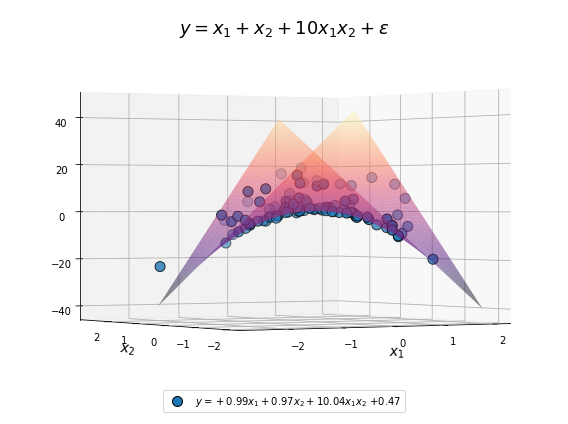

In [18]:
xx1 = np.linspace(-2, 2, 100)
xx2 = np.linspace(-2, 2, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)
zz = lr.intercept_ + lr.coef_[0] * xx1 + lr.coef_[1] * xx2 + lr.coef_[2] * xx1 * xx2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 6))

ax.scatter(X[:, 0], X[:, 1], y, s=100, edgecolor='k', 
           label="$y=%+.2f x_1 %+.2f x_2 %+.2f x_1 x_2$ %+.2f" % 
           (lr.coef_[1], lr.coef_[0], lr.coef_[2], lr.intercept_))

ax.plot_surface(xx1, xx2, zz, cmap='magma', linewidth=0, alpha=0.5)

plt.title("$y=x_1 + x_2 + 10 x_1 x_2 + \epsilon$", size=18)
plt.xlabel("$x_1$", size=14)
plt.ylabel("$x_2$", size=14)

elev = 0 #@param {type:"slider", min:0, max:50, step:1}
angle = 238 #@param {type:"slider", min:0, max:360, step:1}
ax.view_init(elev, angle)
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

Overfitting

In [19]:
#@title
np.random.seed(seed=42)

X, y, coef = make_regression(n_samples=20, n_features=1, 
                             bias=100, coef=True, random_state=random_seed)
X = X / 2
y = 2 * X[:, 0] ** 3 - X[:, 0] ** 2 - X[:, 0] + 20
y = y + np.random.rand(y.size)

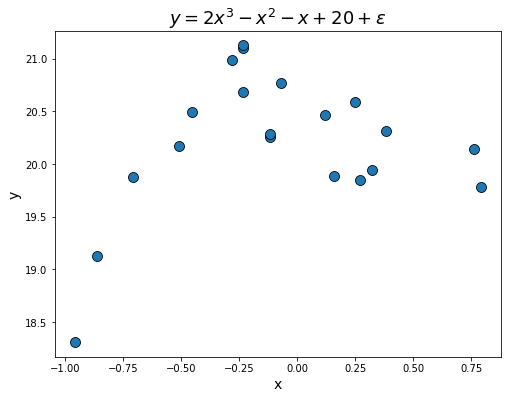

In [20]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X.flatten(), y=y, s=100, edgecolor='k')

plt.title("$y=2x^3 - x^2 - x + 20 + \epsilon$", size=18)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.show()

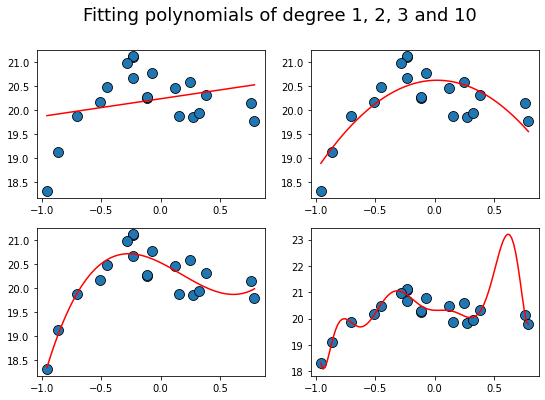

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))

for i, degree in enumerate([1, 2, 3, 10]):
  pf = PolynomialFeatures(degree=degree, include_bias=False)
  X_poly = pf.fit_transform(X)
  lr = LinearRegression()
  lr.fit(X_poly, y)
  x_line = np.linspace(X.min(), X.max(), 100)
  x_line_poly = pf.transform(x_line[:, np.newaxis])
  y_line = lr.intercept_ + np.dot(x_line_poly, lr.coef_)

  ax = axes[i // 2, i % 2]

  sns.scatterplot(x=X.flatten(), y=y, s=100, edgecolor='k', ax=ax)
  sns.lineplot(x=x_line, y=y_line, color='r', ax=ax)

fig.suptitle("Fitting polynomials of degree 1, 2, 3 and 10", size=18)
plt.show()

Generate new sample

In [22]:
#@title
np.random.seed(seed=random_seed)

X, y, coef = make_regression(n_samples=20, n_features=1, 
                             bias=100, coef=True, random_state=random_seed+1)
X = X / 2
y = 2 * X[:, 0] ** 3 - X[:, 0] ** 2 - X[:, 0] + 20
y = y + np.random.rand(y.size)

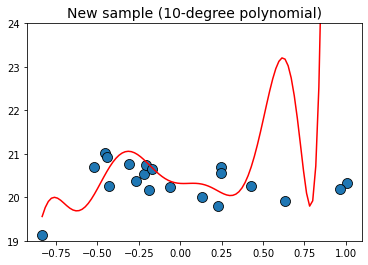

In [23]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X.flatten(), y=y, s=100, edgecolor='k')
x_line = np.linspace(X.min(), X.max(), 100)
x_line_poly = pf.transform(x_line[:, np.newaxis])
y_line = lr.intercept_ + np.dot(x_line_poly, lr.coef_)
sns.lineplot(x=x_line, y=y_line, color='r')

plt.title("New sample (10-degree polynomial)", size=14)
plt.ylim(19, 24)
plt.show()

Structural multicolinearity

In [24]:
#@title
np.random.seed(seed=random_seed)

X, y, coef = make_regression(n_samples=20, n_features=1, 
                             bias=100, coef=True, random_state=random_seed)

X = X * 0.2 + 5
y = - X[:, 0] ** 3 - 3 * X[:, 0] ** 2 - 2 * X[:, 0]
y = y + np.random.rand(y.size) * 50

In [25]:
pf = PolynomialFeatures(degree=2, include_bias=True)
X_poly = pf.fit_transform(X)

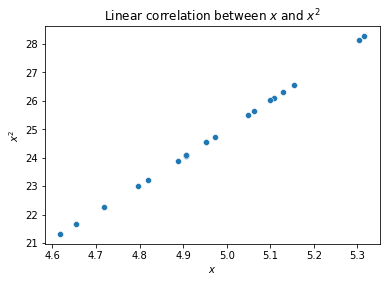

In [26]:
sns.scatterplot(x=X_poly[:, 1], y=X_poly[:, 2])
plt.title("Linear correlation between $x$ and $x^2$")
plt.xlabel("$x$")
plt.ylabel("$x^2$")
plt.show()

In [27]:
vif_values = [variance_inflation_factor(X_poly, i) for i in range(1, 3)]
vif_values

[1938.2188472620562, 1938.218847261639]

In [28]:
X_centered = X - X.mean(axis=0)

In [29]:
pf = PolynomialFeatures(degree=2, include_bias=True)
X_centered_poly = pf.fit_transform(X_centered)

In [30]:
vif_values = [variance_inflation_factor(X_centered_poly, i) for i in range(1, 3)]
vif_values

[1.0003527031288386, 1.000352703128838]

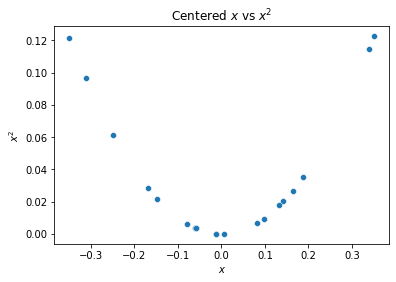

In [31]:
sns.scatterplot(x=X_centered_poly[:, 1], y=X_centered_poly[:, 2])
plt.title("Centered $x$ vs $x^2$")
plt.xlabel("$x$")
plt.ylabel("$x^2$")
plt.show()

Fitting the centered data.

In [32]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_centered_poly, y)

LinearRegression(fit_intercept=False)

In [33]:
b0_centered, b1_centered, b2_centered = lr.coef_

$\beta_2 = \beta^*_2$

$\beta_1 = \beta^*_1 - 2\beta^*_2 \overline x$

$\beta_0 = \beta^*_0 - \beta^*_1 \overline x + \beta^*_2 \overline x^{\ 2}$

In [34]:
b2 = b2_centered
b1 = b1_centered - 2 * b2_centered * X[:, 0].mean()
b0 = b0_centered - b1_centered * X_poly[:, 0].mean() + b2_centered * X_poly[:, 1].mean()

In [35]:
print("y = %.2f %+.2f x %+.2f x^2" % (b0, b1, b2))

y = -780.40 +1295.99 x -139.92 x^2
